# Topology optimization

In [1]:
import math
import matplotlib.pyplot as plt

from loads import HalfBeam
from constraints import DensityConstraint
from fesolvers import CooFESolver
from topopt import Topopt

In [2]:
%matplotlib inline

In [3]:
# material properties
young = 1
poisson = 0.3

# constraints
volfrac = 0.4
xmin = 0.001
xmax = 1.0

# input parameters
nelx = 180
nely = 60

penal = 3.0
rmin = 5.4

delta = 0.02
loopy = math.inf

In [4]:
# loading/problem
load = HalfBeam(nelx, nely)

# constraints
density_constraint = DensityConstraint(volume_frac = volfrac, density_min = xmin, density_max = xmax)

# optimizer
verbose = False
fesolver = CooFESolver(verbose = verbose)
optimizer = Topopt(fesolver, young, poisson, verbose = verbose)

In [5]:
# compute
x = optimizer.init(load, density_constraint)
x, loop = optimizer.layout(load, density_constraint, x, penal, rmin, delta, loopy)

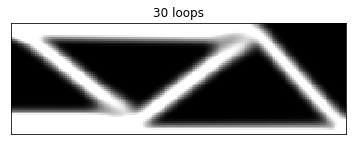

In [6]:
# plot
plt.figure()
plt.imshow(x, cmap=plt.cm.gray)
plt.title(str(loop) + ' loops')
plt.xticks([])
plt.yticks([])
plt.show()